# Ebay Used Car Sales

This is a data cleaning with Python project using Ebay car sales data from Kaggle.

[Source](https://www.kaggle.com/orgesleka/used-cars-database/data')

In [185]:
import pandas as pd
import numpy as np
import datetime as dt
cars = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [186]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [187]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


The first thing we notice is that the results are not in English (well, the variable names are, but not the values). They're in German. 5 variables have some missing values, and the names are in a difficult-to-read format.

In [188]:
#All df names to snakecase, with some manual renaming

cars = cars.rename({"yearOfRegistration" : "registration_year", "monthOfRegistration" : "registration_month",
            "notRepairedDamage" : "unrepaired_damage", "dateCreated" : "ad_created",
            "powerPS" : "power_ps"}, axis = 'columns')

colnames = []
[colnames.append(i) for i in cars.columns]

colnames_snake = []
for i in colnames:
    targetname = i
    for char in targetname:
        if char.isupper():
            targetname = targetname.replace(char, '_' + char.lower())
    colnames_snake.append(targetname)
cars.columns = colnames_snake

All variable names are now in snake case. This is just more python-y. Plus it was good practice.

Now, a bit of Exploratory Data Analysis.

In [189]:
cars.describe(include = "all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [190]:
cars['unrepaired_damage'].value_counts()

nein    263182
ja       36286
Name: unrepaired_damage, dtype: int64

In [191]:
cars = cars.rename({'kilometer':'odometer_km'}, axis = "columns")

**Columns without much variance**:  
1. seller (virtually all are 'privat')  
2. offer_type (Angebot, all but 12)

**Columns to investigate**:
1. nr_of_pictures (numeric... all 0s?)

seller and offer_type will be removed. If number of pictures sums to 0, it will be removed as well.


In [192]:
cars['nr_of_pictures'].sum() # = 0
cars = cars.drop(['seller','offer_type','nr_of_pictures'], axis='columns')

There are also some values that don't make sense:  
1. Registration years greater than the latest date in the data
2. Registration months equal to 0  
3. Billion dollar prices (nice car)  
4. power_pos has a very high max values
5. Suspicious odometer column... looks like a lot of values are rounded to 150,000 km

We'll check and remove or replace them in order.


In [194]:
print(cars[cars['date_crawled'] > '2016-05-01'].shape)
print(cars[cars['registration_year'] >= 2017].shape)
print(cars[cars['registration_year'] < 1910].shape)

(0, 17)
(14680, 17)
(68, 17)


Though 14,680 is no small figure, it seems unlikely that there were any 2017 model vehicles in the classifieds given that all the data was scraped before May 2016. As far as I can tell, this is possible, but very rare.

We'll remove them.

There are far fewer vehicles with first registration before 1910. If we look, there are a few more between 1910 and 1920, but they look like they may be real.

In [195]:
cars = cars[cars['registration_year'].between(1910,2016)]

Now a look at registration months.

In [196]:
print(cars[~cars['registration_month'].between(1,12)].shape)
print(cars[~cars['registration_month'].between(1,12)].head())

(33915, 17)
           date_crawled                                               name  \
0   2016-03-24 11:52:17                                         Golf_3_1.6   
9   2016-03-17 10:53:50  VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...   
15  2016-03-11 21:39:15                       KA_Lufthansa_Edition_450_VB   
16  2016-04-01 12:46:46                                        Polo_6n_1_4   
36  2016-03-11 11:50:37                                   Opel_Kadett_E_CC   

    price   abtest vehicle_type  registration_year  gearbox  power_ps   model  \
0     480     test          NaN               1993  manuell         0    golf   
9     999     test   kleinwagen               1998  manuell       101    golf   
15    450     test   kleinwagen               1910      NaN         0      ka   
16    300     test          NaN               2016      NaN        60    polo   
36   1600  control       andere               1991  manuell        75  kadett   

    odometer_km  registration_mo

Though there are nearly 34,000 ads with a registration month of 0, this is probably just omission by the poster. There doesn't seem to be any particular issue here.

Next up: Billion dollar vehicles.

In [197]:
cars[cars['price'] > 5e5]['price'].value_counts()

99999999      14
999999        11
11111111       9
12345678       7
10000000       6
1000000        5
9999999        3
1600000        2
1111111        2
745000         2
1250000        2
600000         2
650000         1
99000000       1
74185296       1
999990         1
820000         1
911911         1
585000         1
725000         1
517895         1
2147483647     1
32545461       1
10010011       1
579000         1
27322222       1
780000         1
2795000        1
619000         1
14000500       1
599000         1
2995000        1
700000         1
1300000        1
3895000        1
1234566        1
849000         1
3890000        1
Name: price, dtype: int64

While there are some values here that are likely legitimate, most of the values seem like fake prices. If I were concerned with these cars anyway, it would be little hassle to do some searching to see which might be legitimate, but for now we'll just delete anything over $500K.

In [198]:
cars = cars[cars['price'] < 5e5]
print(cars.shape)

(356687, 17)


Now, to some power_ps values that are very high. A quick google search tells us that some of the most powerful cars ever have had PS (somewhat close to horsepower) in the low 800s. A couple of quick google searches of the cars in the data set tell us that none of them have anywhere near the POS they're showing. We'll remove those, too.

Chances are we don't really need to remove them. We could just null these values, depending on what we want to do. Or even look up the cars and get their real horsepower, but we have several hundred thousand and that's a high-effort fix for a few hundred rows in a coding exercise.

In [199]:
cars = cars[cars['power_ps'] < 800]

Finally... what's up with that odometer column?

In [200]:
cars['odometer_km'].value_counts()

150000    229916
125000     36623
100000     15434
90000      12141
80000      10749
70000       9527
60000       8501
50000       7435
5000        6549
40000       6263
30000       5894
20000       5497
10000       1843
Name: odometer_km, dtype: int64

Hmm. I wouldn't call any of these outliers, but it's fairly clear that anything over 150K (and possibly under, and rounded up?) is rounded down to 150K.

Use the workflow we just described to calculate the distribution of values in the date_crawled, ad_created, and last_seen columns (all string columns) as percentages.

To include missing values in the distribution and to use percentages instead of counts, chain the Series.value_counts(normalize=True, dropna=False) method.

To rank by date in ascending order (earliest to latest), chain the Series.sort_index() method.

Write a markdown cell after each column exploration to explain your observations.

Use Series.describe() to understand the distribution of registration_year.

Write a markdown cell explaining your observations

In [201]:
cars['date_crawled'] = pd.to_datetime(cars['date_crawled'])
cars['ad_created']   = pd.to_datetime(cars['ad_created'])
cars['last_seen']    = pd.to_datetime(cars['last_seen'])

In [202]:
cars['date_crawled'].dt.strftime('%Y-%m-%d').value_counts(dropna = False).sort_index()

2016-03-05     9142
2016-03-06     5187
2016-03-07    12771
2016-03-08    11961
2016-03-09    12204
2016-03-10    11621
2016-03-11    11647
2016-03-12    12901
2016-03-13     5616
2016-03-14    12884
2016-03-15    11915
2016-03-16    10765
2016-03-17    11245
2016-03-18     4662
2016-03-19    12554
2016-03-20    12976
2016-03-21    12737
2016-03-22    11569
2016-03-23    11387
2016-03-24    10653
2016-03-25    11731
2016-03-26    11386
2016-03-27    10733
2016-03-28    12486
2016-03-29    12183
2016-03-30    11951
2016-03-31    11354
2016-04-01    12177
2016-04-02    12486
2016-04-03    13825
2016-04-04    13428
2016-04-05     4535
2016-04-06     1130
2016-04-07      570
Name: date_crawled, dtype: int64

OK, looks like the crawling was completed for about a month in March 2016 and tailed off a little at the end... not sure whether this information adds any value at all, though.

In [203]:
cars['ad_created'].dt.strftime('%Y-%m-%d').value_counts(dropna = False).sort_index()

2014-03-10        1
2015-03-20        1
2015-06-11        1
2015-06-18        1
2015-08-07        1
2015-08-10        1
2015-09-04        2
2015-09-09        1
2015-10-14        1
2015-11-02        1
2015-11-08        1
2015-11-10        1
2015-11-12        1
2015-11-13        1
2015-11-17        1
2015-11-23        2
2015-11-24        2
2015-12-05        3
2015-12-06        1
2015-12-17        1
2015-12-27        1
2015-12-28        1
2015-12-30        3
2016-01-02        4
2016-01-03        1
2016-01-06        1
2016-01-07        3
2016-01-08        1
2016-01-10        4
2016-01-13        3
              ...  
2016-03-09    12215
2016-03-10    11581
2016-03-11    11657
2016-03-12    12843
2016-03-13     6070
2016-03-14    12514
2016-03-15    11882
2016-03-16    10847
2016-03-17    11100
2016-03-18     4976
2016-03-19    12219
2016-03-20    13014
2016-03-21    12764
2016-03-22    11459
2016-03-23    11369
2016-03-24    10677
2016-03-25    11757
2016-03-26    11430
2016-03-27    10641


ad_created looks much like date_crawled. It's a bit different, but not by much. 

In [204]:
cars['last_seen'].dt.strftime('%Y-%m-%d').value_counts(dropna = False).sort_index()

2016-03-05      461
2016-03-06     1459
2016-03-07     1880
2016-03-08     2841
2016-03-09     3539
2016-03-10     4100
2016-03-11     4621
2016-03-12     8293
2016-03-13     2997
2016-03-14     4367
2016-03-15     5832
2016-03-16     5816
2016-03-17    10172
2016-03-18     2441
2016-03-19     5763
2016-03-20     7033
2016-03-21     7132
2016-03-22     7305
2016-03-23     6416
2016-03-24     6828
2016-03-25     6744
2016-03-26     5701
2016-03-27     5960
2016-03-28     7878
2016-03-29     8262
2016-03-30     8466
2016-03-31     8612
2016-04-01     8530
2016-04-02     8834
2016-04-03     8986
2016-04-04     9099
2016-04-05    45191
2016-04-06    78215
2016-04-07    46598
Name: last_seen, dtype: int64

last_seen is very heavy in the most recent few days, which makes some sense... if people still have their vehicles posted for sale, chances are good they'll continue to look at it.

In [205]:
cars['registration_year'].describe()

count    356372.000000
mean       2002.783580
std           7.387758
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2016.000000
Name: registration_year, dtype: float64

In [116]:
cars['registration_year'].value_counts(dropna = False).sort_index()

1910      102
1911        1
1915        1
1919        1
1920        1
1923        3
1925        1
1927        2
1928        2
1929        8
1930        5
1931        4
1932        4
1933        6
1934        5
1935        6
1936        7
1937       13
1938        8
1939        4
1940        2
1941        4
1942        3
1943        5
1944        2
1945        4
1946        2
1947        5
1948        4
1949        3
        ...  
1987      696
1988      965
1989     1340
1990     2849
1991     2806
1992     3039
1993     3464
1994     4867
1995     9642
1996    10867
1997    14686
1998    17929
1999    22741
2000    24514
2001    20193
2002    19163
2003    19856
2004    19726
2005    22295
2006    20211
2007    17657
2008    16167
2009    15598
2010    12348
2011    12064
2012     9416
2013     6153
2014     4800
2015     2981
2016     9832
Name: registration_year, Length: 97, dtype: int64

Given these are used cars, the distribution mostly makes sense. The only exception is 1910, with 102 values. The other values in the early 20th century *could* be real, though there's a middling chance some of those are misentered as well. For now, 1910 is the only year where most or all of the values are clearly incorrect. As before, we'll cut these incorrect values out of the data without further investigation.

In [206]:
cars = cars[cars['registration_year'].between(1911,2016)]

Now, I'll look at different car brands to see what is being sold.

### Brands

In [207]:
cars[cars['brand'] == 'ford'].shape[0]

24528

In [208]:
top20brands = cars['brand'].value_counts().index[0:19].tolist()
top20 = cars[cars['brand'].isin(top20brands)]

meanpricebybrand = {}

#Dictionary with mean of [price, kilometers]
for brand in top20brands:
    sumprices = cars[cars['brand'] == brand]['price'].sum()
    sumkm     = cars[cars['brand'] == brand]['odometer_km'].sum()
    valcount  = cars[cars['brand'] == brand].shape[0]
    
    
    meanpricebybrand[brand] = [round(sumprices / valcount,0),round(sumkm / valcount, 0)]
    
meanpricebybrand

{'volkswagen': [5230.0, 128354.0],
 'bmw': [8239.0, 132668.0],
 'opel': [2871.0, 128770.0],
 'mercedes_benz': [8400.0, 130586.0],
 'audi': [8852.0, 129517.0],
 'ford': [3598.0, 123616.0],
 'renault': [2367.0, 127878.0],
 'peugeot': [3207.0, 124611.0],
 'fiat': [2806.0, 116506.0],
 'seat': [4424.0, 120920.0],
 'skoda': [6461.0, 113728.0],
 'mazda': [3971.0, 125941.0],
 'smart': [3584.0, 99702.0],
 'citroen': [3652.0, 120355.0],
 'nissan': [4588.0, 119544.0],
 'toyota': [5264.0, 117410.0],
 'sonstige_autos': [13003.0, 87232.0],
 'hyundai': [5492.0, 104354.0],
 'mini': [9981.0, 93573.0]}

Sonstige Autos, which I've never heard of, stands out as the most expensive used car at \\$13,003, though the figure is just the straight mean without context. The least expensive mean price is the renault, at \\$2,367.
...
After a bit of googling, it turns out that sonstige is the German word for 'Other'. That may explain why they're most expensive. Most of the automakers above are well known and are producing cars for as many people as possible. Other autos may include automakers that produce fewer, but more expensive cars.

Beyond that, there is a distinction between used mercedes/audi/bmw, midrange like toyota/volkswagen/hyundai, and then the less expensive like renault/opel/fiat.

In [209]:
cars[cars['brand'] == 'sonstige_autos']['name'].value_counts()

Dodge_RAM                                                            48
MG_MGF_1.8i                                                          23
Wartburg_353                                                         21
Pontiac_Firebird                                                     18
Andere_Andere                                                        17
Suche_Auto                                                           15
MG_MGB                                                               14
MG_MG_TF_135                                                         12
Abarth_500                                                           12
Lexus_IS_200                                                         11
Hummer_H2                                                            10
Dodge_Durango                                                        10
Triumph_Spitfire                                                      9
Dodge_Charger                                                   

Aha. The vehicles that appear more often still include mass produced vehicles like Dodge, and Cadillac. But, we also see Lamborghini, Corvette, Porsche, and **Pontiac**.

Now... the top 6 brands, with mileage, to see if there's some relationship between mileage and price beyond the brand.

### Top 6 Brands, with mileage

In [230]:
top6brands = top20brands[0:6]

top20meandf = pd.DataFrame.from_dict(meanpricebybrand, orient = 'index')
top20meandf.columns = ['meanprice','meankm']
top6meandf = top20meandf.loc[top6brands]
top6meandf.sort_values('meanprice')

,meanprice,meankm
opel,2871.0,128770.0
ford,3598.0,123616.0
volkswagen,5230.0,128354.0
bmw,8239.0,132668.0
mercedes_benz,8400.0,130586.0
audi,8852.0,129517.0


The instructions ask for pprint... doesn't look any better than the table above, though.

In [215]:
import pprint

pprint.pprint(top6meandf)

               meanprice    meankm
volkswagen        5230.0  128354.0
bmw               8239.0  132668.0
opel              2871.0  128770.0
mercedes_benz     8400.0  130586.0
audi              8852.0  129517.0
ford              3598.0  123616.0


I'm not sure whether the data is correct... most of the kilometre values are 150k in the data. But, if we assume they're accurate, it's not at all clear from this table that there's any connection between price and the number of kilometres the car has been driven.

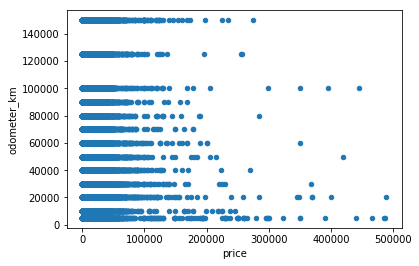

In [233]:
import matplotlib.pyplot as plt

cars.plot(kind ="scatter" , x='price',y='odometer_km')
plt.show()

Next steps:  
1) Convert german categoricals to english  
2) Convert dates to integers  
3) See if there are keywords in the name column to extract to new columns  

### German to English

Some variables that need to be mapped:   
vehicle_type  
gearbox  
fuel_type  
unrepaired_damage  

In [255]:
#cars['vehicle_type'].value_counts(dropna = False)
#cars['gearbox'].value_counts(dropna = False)
#cars['fuel_type'].value_counts(dropna = False)
#cars['unrepaired_damage'].value_counts(dropna = False)

In [257]:
vhc_typemap = {'limousine' : 'limousine',
               'kleinwagen' : 'compact',
               'kombi' : 'van',
               'bus' : 'bus',
               'cabrio' : 'convertible',
               'andere' : 'other',
               'coupe' : 'coupe',
               'suv' : 'suv'}

gear_typemap = {'manuell':'manual', 'automatik':'automatic'}

fuel_typemap = {'benzin' : 'gasoline',
               'diesel' : 'diesel',
               'lpg' : 'liquefied natural gas',
               'cng' : 'compressed natural gas',
               'hybrid' : 'hybrid',
               'andere' : 'other',
               'elektro' : 'electric'}

damage_typemap = {'nein' : 'no',
                 'ja' : 'yes'}

cars['vehicle_type'] = cars['vehicle_type'].map(vhc_typemap)
cars['gearbox'] = cars['gearbox'].map(gear_typemap)
cars['fuel_type'] = cars['fuel_type'].map(fuel_typemap)
cars['unrepaired_damage'] = cars['unrepaired_damage'].map(damage_typemap)

### Dates to Integers

In [266]:
cars['date_crawled_int'] = cars['date_crawled'].dt.strftime('%Y%m%d').astype('int')
cars['ad_created_int'] = cars['ad_created'].dt.strftime('%Y%m%d').astype('int')
cars['last_seen_int'] = cars['last_seen'].dt.strftime('%Y%m%d').astype('int')

In [268]:
cars.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,date_crawled_int,ad_created_int,last_seen_int
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24,70435,2016-04-07 03:16:57,20160324,20160324,20160407
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,2016-03-24,66954,2016-04-07 01:46:50,20160324,20160324,20160407
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05 12:47:46,20160314,20160314,20160405
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,test,compact,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17,20160317,20160317,20160317
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,compact,2008,manual,69,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:21,20160331,20160331,20160406


### Keywords in name column?

In [307]:
test = cars[['name','brand','model']].copy()
test['name'] = test['name'].str.lower()
test['brand'] = test['brand'].str.lower()
test['model'] = test['model'].str.lower()
test.head()

,name,brand,model
0,golf_3_1.6,volkswagen,golf
1,a5_sportback_2.7_tdi,audi,NaN
2,"jeep_grand_cherokee_""overland""",jeep,grand
3,golf_4_1_4__3türer,volkswagen,golf
4,skoda_fabia_1.4_tdi_pd_classic,skoda,fabia


### Find the most common brand/model combinations

In [322]:
brandmodel = cars[['brand','model']].copy()
brandmodel['combo'] = brandmodel['brand'] + ' ' + brandmodel['model']

In [325]:
brandmodel['combo'].value_counts()

volkswagen golf               28405
bmw 3er                       20007
volkswagen polo               12460
opel corsa                    11928
opel astra                    10344
audi a4                       10043
volkswagen passat              9989
mercedes_benz c_klasse         8567
bmw 5er                        8388
mercedes_benz e_klasse         7402
audi a3                        6238
audi a6                        5898
ford focus                     5698
ford fiesta                    5548
volkswagen transporter         5357
peugeot 2_reihe                4698
renault twingo                 4642
smart fortwo                   4188
opel vectra                    4086
mercedes_benz a_klasse         4034
bmw 1er                        3737
ford mondeo                    3520
renault clio                   3366
volkswagen touran              3326
mercedes_benz andere           3283
fiat punto                     3136
opel zafira                    2851
renault megane              

Wow, those Volkswagens are really popular in German Classifieds.

### How much cheaper are cars with damage than their non-damaged counterparts?  

In [330]:
damage = cars[['price','unrepaired_damage']].copy()
damage.groupby('unrepaired_damage').price.mean().round(2)

unrepaired_damage
no     7079.38
yes    2115.68
Name: price, dtype: float64

Though it's just the mean, it's pretty unsurprising that cars with unrepaired damage are sold for a much lower price on average.